# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import matplotlib

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\veldu\AppData\Local\Continuum\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the number of dwelling types units per year (hint: use groupby and sum)
dwell_types_per_year_df = (
    to_data.groupby(to_data.index)['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']
    .sum()
)
dwell_types_per_year_df

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [8]:
# Save the dataframe as a csv file
dwell_types_per_year_df.to_csv("dwellng_types_per_year.csv")

In [9]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    fig, ax = plt.subplots()
    ax = data.plot(kind='bar',title=title,color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax 

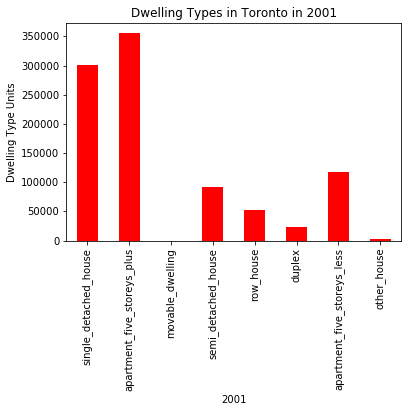

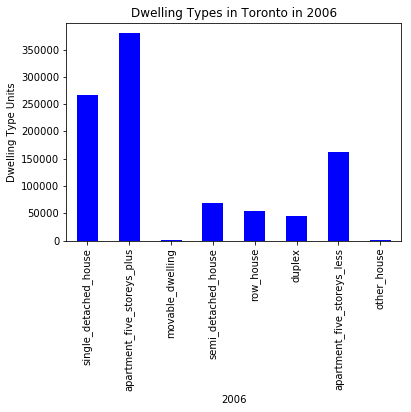

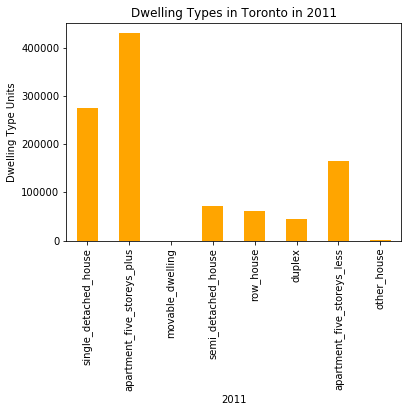

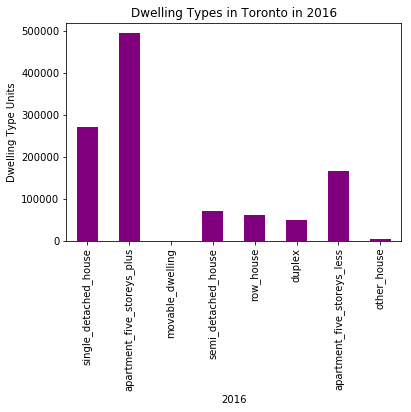

In [10]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart(dwell_types_per_year_df.loc[2001],"Dwelling Types in Toronto in 2001","2001","Dwelling Type Units","r")

# Bar chart for 2006
create_bar_chart(dwell_types_per_year_df.loc[2006],"Dwelling Types in Toronto in 2006","2006","Dwelling Type Units","b")

# Bar chart for 2011
create_bar_chart(dwell_types_per_year_df.loc[2011],"Dwelling Types in Toronto in 2011","2011","Dwelling Type Units","orange")

# Bar chart for 2016
create_bar_chart(dwell_types_per_year_df.loc[2016],"Dwelling Types in Toronto in 2016","2016","Dwelling Type Units","purple")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [11]:
# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_costs_per_year_df = (
    to_data.groupby(to_data.index)['shelter_costs_owned','shelter_costs_rented']
    .mean()
)

shelter_costs_per_year_df

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [12]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    fig, ax = plt.subplots()
    ax = data.plot(kind='line',title=title,color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax 

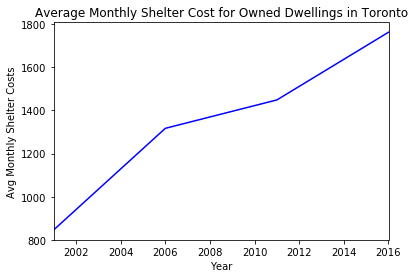

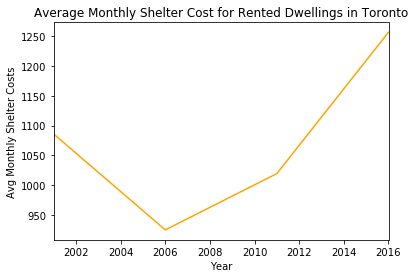

In [13]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(shelter_costs_per_year_df['shelter_costs_owned'],"Average Monthly Shelter Cost for Owned Dwellings in Toronto","Year","Avg Monthly Shelter Costs","b")

# Line chart for rented dwellings
create_line_chart(shelter_costs_per_year_df['shelter_costs_rented'],"Average Monthly Shelter Cost for Rented Dwellings in Toronto","Year","Avg Monthly Shelter Costs","orange")

## Average House Value per Year

In [14]:
# Calculate the average house value per
avg_house_value_per_year_df = (
    to_data.groupby(to_data.index)['average_house_value']
    .mean()
)

avg_house_value_per_year_df

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

Text(0, 0.5, 'Avg. House Value')

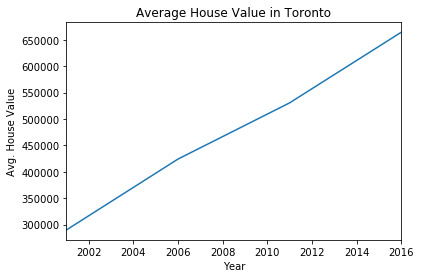

In [15]:
# Plot the average house value per year as a line chart
ax = avg_house_value_per_year_df.plot(kind="line", title = "Average House Value in Toronto")
ax.set_xlabel("Year")
ax.set_ylabel("Avg. House Value")


- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [16]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_house_value_neigh_df  = to_data[['neighbourhood','average_house_value']].reset_index()
avg_house_value_neigh_df.head()

year                 neighbourhood  average_house_value
0  2001               Agincourt North               200388
1  2001  Agincourt South-Malvern West               203047
2  2001                     Alderwood               259998
3  2001                         Annex               453850
4  2001             Banbury-Don Mills               371864

In [17]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
avg_house_value_neigh_df.hvplot(kind='line',x='year',y='average_house_value',groupby='neighbourhood',xlabel='Year',ylabel ='Avg. House Value')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean number of dwelling types for each year and neighbourhood.

In [18]:
# Fetch the data of all dwelling types per year
to_data_without_index = to_data.reset_index()
to_data_without_index.head(10)

year                 neighbourhood  single_detached_house  \
0  2001               Agincourt North                   3715   
1  2001  Agincourt South-Malvern West                   3250   
2  2001                     Alderwood                   3175   
3  2001                         Annex                   1060   
4  2001             Banbury-Don Mills                   3615   
5  2001                Bathurst Manor                   2405   
6  2001           Bay Street Corridor                     10   
7  2001               Bayview Village                   2170   
8  2001         Bayview Woods-Steeles                   1650   
9  2001          Bedford Park-Nortown                   4985   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         1480                 0                 1055   
1                         1835                 0                  545   
2                          315                 0                  470   
3                         6090                 5                 1980   
4                         4465                 0                  240   
5                         1550                 0                  130   
6                         7575                 0                    0   
7                          630                 0                  170   
8                         1715                 0                  925   
9                         2080                 0                   45   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0       1295     195                          185            5   
1        455     105                          425            0   
2         50     185                          370            0   
3        605     275                         3710          165   
4        380      15                         1360            0   
5        130     375                          745            0   
6         15       0                          240            0   
7        765      15                          640            0   
8        105      10                          170            5   
9         40     210                         1235           15   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0               200388                  810                   870  
1               203047                  806                   892  
2               259998                  817                   924  
3               453850                 1027                  1378  
4               371864                 1007                  1163  
5               304749                  843                  1052  
6               257404                 1218                  1142  
7               327644                 1197                  1164  
8               343535                 1212                  1018  
9               565304                  933                  1491

In [19]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
to_data_without_index.hvplot(
    kind='bar',
    x="year",
    y=('single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house'),
    rot=90, 
    groupby='neighbourhood',
    xlabel='Year',
    ylabel ='Dwelling Type Units',
    width=800, 
    height=500
)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [20]:
# Getting the data from the top 10 expensive neighbourhoods
#to_data_without_year_df = to_data_without_index.drop(columns = ['year'])

top_10_expensive_df = (
    to_data
    .groupby('neighbourhood')
    .mean()
    .sort_values('average_house_value',ascending = False)
    .head(10)
)

top_10_expensive_df

single_detached_house  \
neighbourhood                                              
Bridle Path-Sunnybrook-York Mills                2260.00   
Forest Hill South                                1742.50   
Lawrence Park South                              3472.50   
Rosedale-Moore Park                              2498.75   
St.Andrew-Windfields                             3225.00   
Casa Loma                                         916.25   
Bedford Park-Nortown                             4865.00   
Forest Hill North                                1488.75   
Kingsway South                                   2326.25   
Yonge-St.Clair                                    565.00   

                                   apartment_five_storeys_plus  \
neighbourhood                                                    
Bridle Path-Sunnybrook-York Mills                       331.25   
Forest Hill South                                      2031.25   
Lawrence Park South                                     773.75   
Rosedale-Moore Park                                    4641.25   
St.Andrew-Windfields                                   1670.00   
Casa Loma                                              2310.00   
Bedford Park-Nortown                                   1981.25   
Forest Hill North                                      3392.50   
Kingsway South                                          576.25   
Yonge-St.Clair                                         3948.75   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                                                              
Bridle Path-Sunnybrook-York Mills              0.00                36.25   
Forest Hill South                              1.25                61.25   
Lawrence Park South                            0.00               126.25   
Rosedale-Moore Park                            0.00               486.25   
St.Andrew-Windfields                           0.00               185.00   
Casa Loma                                      0.00               288.75   
Bedford Park-Nortown                           0.00                43.75   
Forest Hill North                              0.00                12.50   
Kingsway South                                 0.00                66.25   
Yonge-St.Clair                                 0.00               425.00   

                                   row_house  duplex  \
neighbourhood                                          
Bridle Path-Sunnybrook-York Mills      90.00    25.0   
Forest Hill South                      45.00    75.0   
Lawrence Park South                    38.75   225.0   
Rosedale-Moore Park                   245.00   327.5   
St.Andrew-Windfields                  552.50    97.5   
Casa Loma                             201.25   162.5   
Bedford Park-Nortown                   57.50   287.5   
Forest Hill North                      16.25    82.5   
Kingsway South                         48.75    20.0   
Yonge-St.Clair                        212.50   172.5   

                                   apartment_five_storeys_less  other_house  \
neighbourhood                                                                 
Bridle Path-Sunnybrook-York Mills                        40.00         0.00   
Forest Hill South                                      1027.50         3.75   
Lawrence Park South                                     966.25        16.25   
Rosedale-Moore Park                                    1618.75         2.50   
St.Andrew-Windfields                                    586.25         5.00   
Casa Loma                                              1192.50         2.50   
Bedford Park-Nortown                                   1275.00        88.75   
Forest Hill North                                       402.50         1.25   
Kingsway South                                          336.25         2.50   
Yonge-St.Clair                                         1308.75    

In [21]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_expensive_df.hvplot(kind='bar',
                           x='neighbourhood',
                           y='average_house_value'
                           ,rot=90,
                           xlabel='Neighbourhood',
                           ylabel ='Avg. House Value',
                           width=800, 
                           height=500,
                           title = "Top 10 Expensive Neighbourhooods in Toronto"
                          )

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Cost Analysis

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

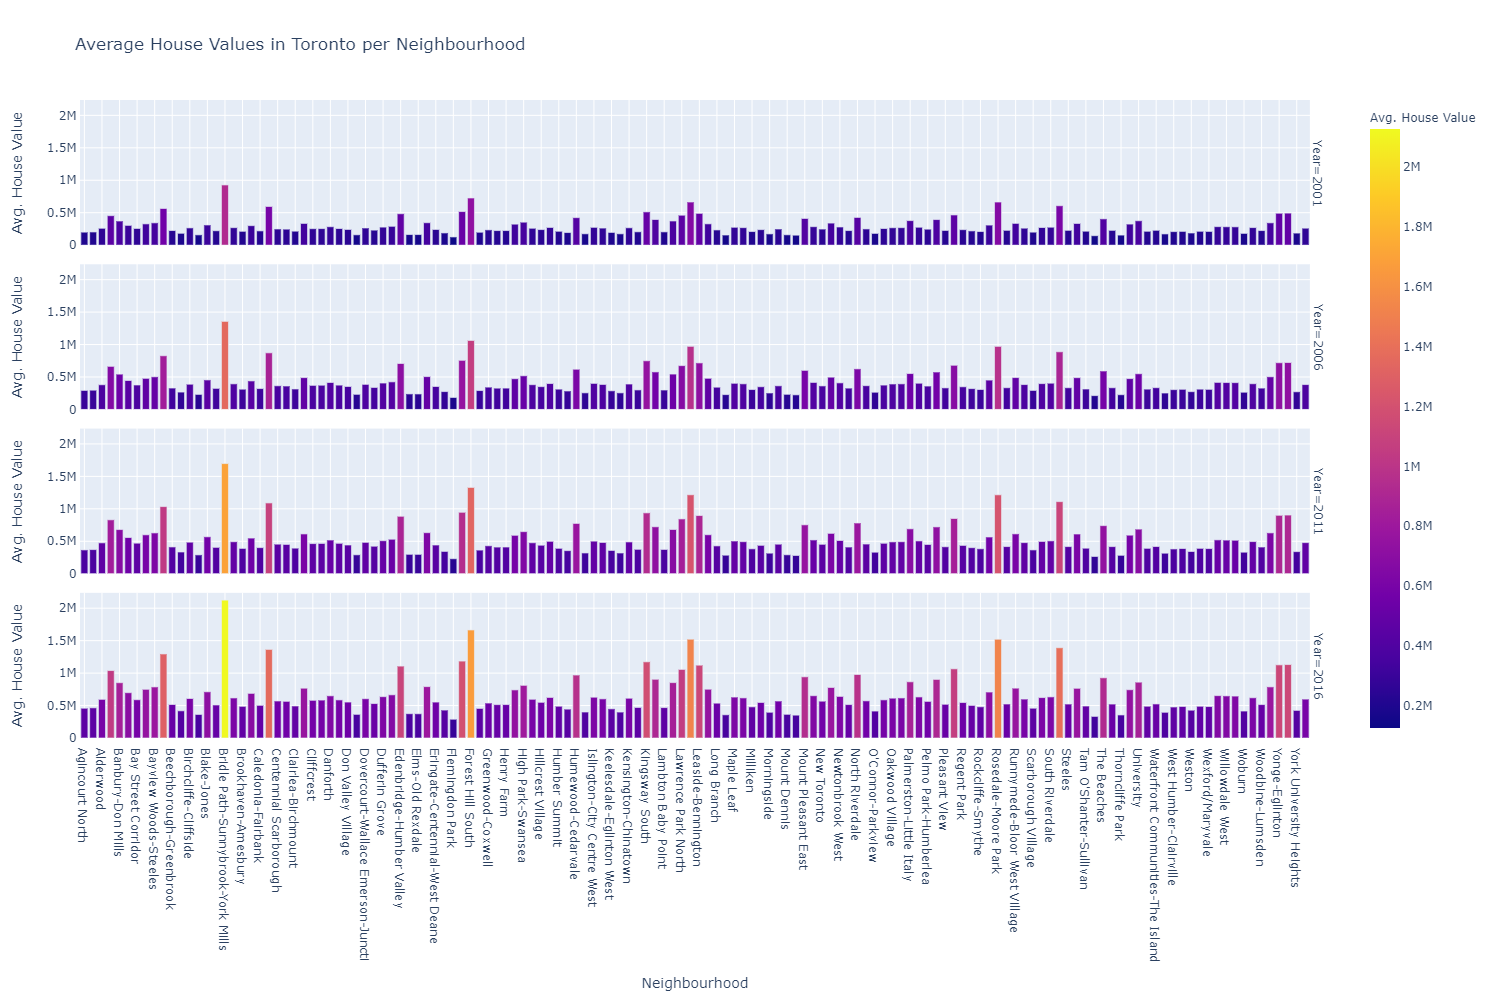

In [22]:
px.bar(
    to_data,
    x="neighbourhood",
    y="average_house_value",
    color="average_house_value",
    facet_row=to_data.index,
    width=1200,
    height=1000,
    title = "Average House Values in Toronto per Neighbourhood",
    labels={
        "neighbourhood": "Neighbourhood",
        "average_house_value": "Avg. House Value",
        "year": "Year"
        },
)


### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [23]:
# Fetch the data from all expensive neighbourhoods per year.
cost_analysis_top_neigh_df = (
    to_data_without_index.sort_values("average_house_value", ascending=False)
    .groupby("year")
    .head(10)
)

cost_analysis_top_neigh_df.head()

year                      neighbourhood  single_detached_house  \
436  2016  Bridle Path-Sunnybrook-York Mills                   2275   
296  2011  Bridle Path-Sunnybrook-York Mills                   2285   
464  2016                  Forest Hill South                   1685   
489  2016                Lawrence Park South                   3420   
524  2016                Rosedale-Moore Park                   2450   

     apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
436                          590                 0                   40   
296                          480                 0                   45   
464                         2025                 0                   65   
489                          925                 0                  110   
524                         4990                 0                  485   

     row_house  duplex  apartment_five_storeys_less  other_house  \
436        230      30                           80            0   
296        100      30                           50            0   
464         40      70                         1050            0   
489         35     230                         1015            5   
524        260     345                         1505            5   

     average_house_value  shelter_costs_owned  shelter_costs_rented  
436              2124653                 2903                  2942  
296              1697067                 2387                  2388  
464              1664653                 2383                  1486  
489              1522732                 2644                  1515  
524              1522193                 2498                  1809

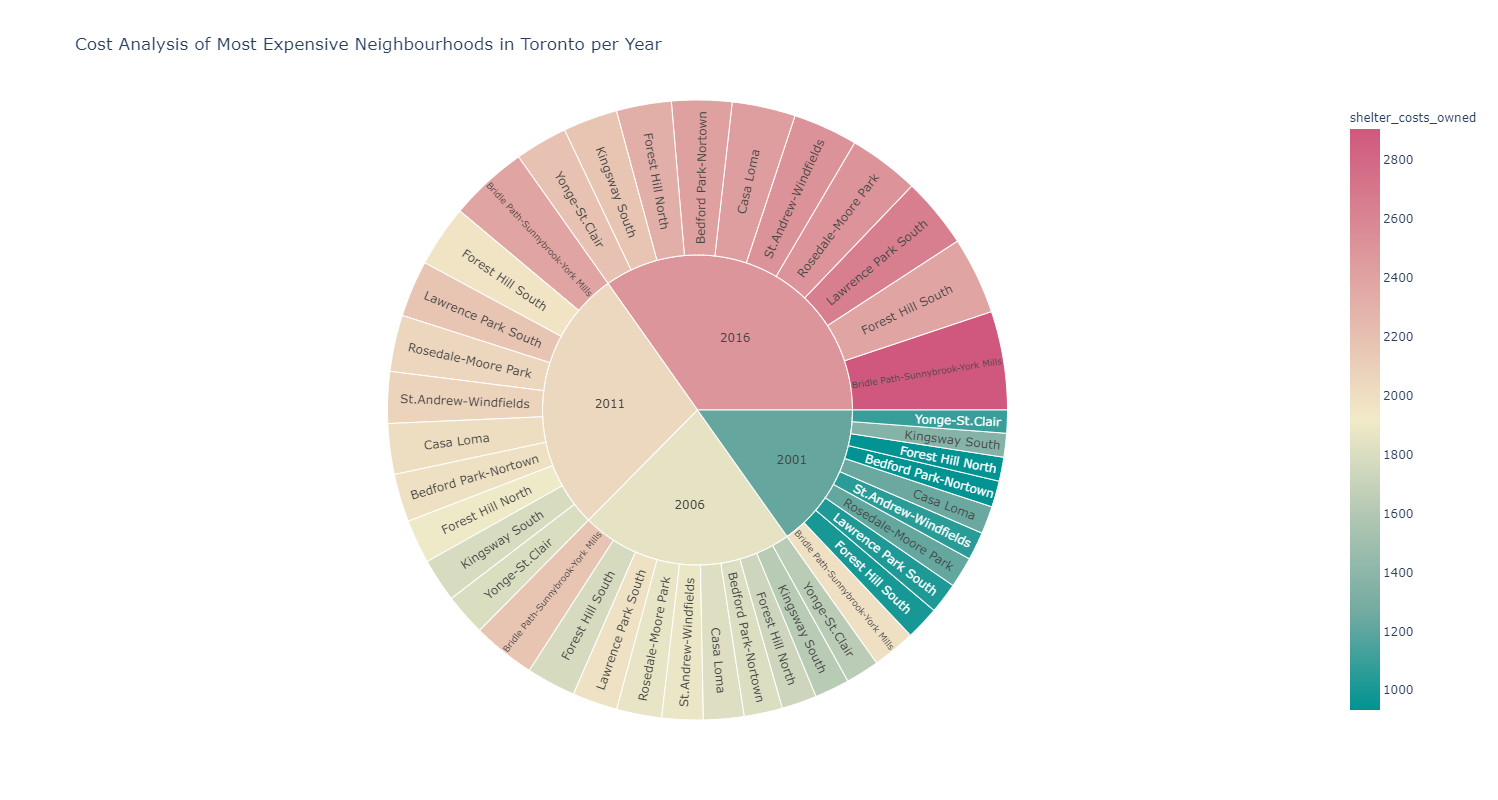

In [24]:
# Create the sunburst chart
px.sunburst(
    cost_analysis_top_neigh_df, 
    path=["year", 'neighbourhood'], 
    values='average_house_value',
    title = "Cost Analysis of Most Expensive Neighbourhoods in Toronto per Year",
    color = "shelter_costs_owned",
    width = 1000,
    height = 800,
    color_continuous_scale=px.colors.diverging.Tealrose
)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [25]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")

df_neighbourhood_locations = pd.read_csv(file_path)

df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [26]:
# Calculate the mean values for each neighborhood

to_data_without_year_df = to_data_without_index.drop(columns='year')

mean_value_neigh_df = (
    to_data_without_year_df
    .groupby('neighbourhood')
    .mean()
    .sort_values('neighbourhood')
    .reset_index()
)

mean_value_neigh_df.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [27]:
# Join the average values with the neighbourhood locations
avg_value_neigh_df = pd.merge(mean_value_neigh_df,df_neighbourhood_locations,how='inner',on='neighbourhood')

avg_value_neigh_df.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented        lat  \
0             329811.5              1109.00                983.50  43.805441   
1             334189.0              1131.25                985.00  43.788658   
2             427922.5              1166.75               1003.25  43.604937   
3             746977.0              1692.75               1315.25  43.671585   
4             612039.0              1463.50               1242.75  43.737657   

         lon  
0 -79.266712  
1 -79.265612  
2 -79.541611  
3 -79.404001  
4 -79.349718

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

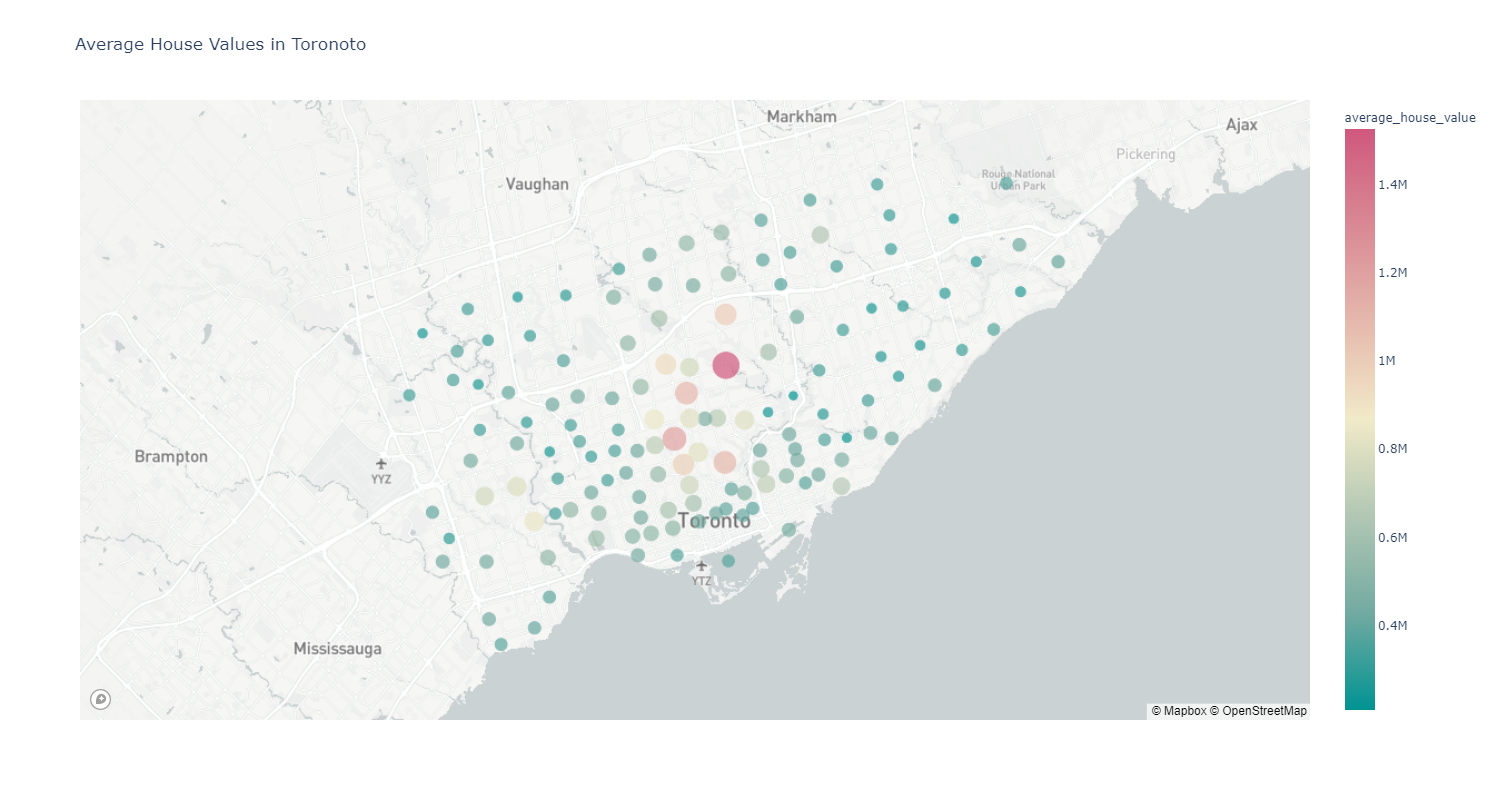

In [28]:
# Create a scatter mapbox to analyze neighbourhood info
map = px.scatter_mapbox(
    avg_value_neigh_df,
    lat="lat",
    lon="lon",
    color="average_house_value",
    size="average_house_value",
    zoom= 10,
    width = 1200,
    height = 800,
    color_continuous_scale=px.colors.diverging.Tealrose,
    title = 'Average House Values in Toronoto',
    hover_name = "neighbourhood",
    hover_data = ["average_house_value","shelter_costs_owned","shelter_costs_rented","single_detached_house","apartment_five_storeys_plus","movable_dwelling","semi_detached_house","row_house","duplex","apartment_five_storeys_less","other_house","lat","lon"]
)

# Display the map
map.show()